Epoch 0
MLP: Loss 0.4914 | Acc 50.0%
KAN: Loss 0.4712 | Acc 50.0%
-------------------
Epoch 300
MLP: Loss 0.0074 | Acc 100.0%
KAN: Loss 0.2057 | Acc 100.0%
-------------------
Epoch 600
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.1488 | Acc 100.0%
-------------------
Epoch 900
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.0890 | Acc 100.0%
-------------------
Epoch 1200
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.0375 | Acc 100.0%
-------------------
Epoch 1500
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.0110 | Acc 100.0%
-------------------
Epoch 1800
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.0025 | Acc 100.0%
-------------------
Epoch 2100
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.0005 | Acc 100.0%
-------------------
Epoch 2400
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.0001 | Acc 100.0%
-------------------
Epoch 2700
MLP: Loss 0.0000 | Acc 100.0%
KAN: Loss 0.0000 | Acc 100.0%
-------------------


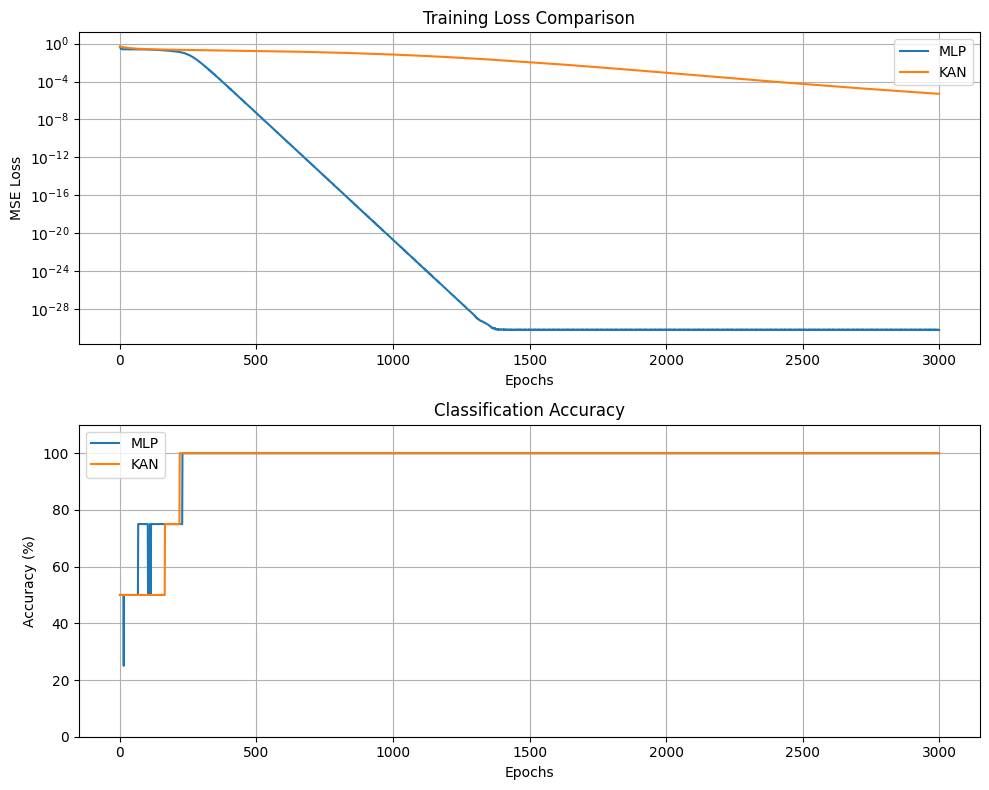


MLP Results:
Final Loss: 0.0000
Accuracy: 100.0%
Predictions:
[[8.80419321e-16]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.17685031e-16]]

KAN Results:
Final Loss: 0.0000
Accuracy: 100.0%
Predictions:
[[ 3.90813147e-03]
 [ 9.98498253e-01]
 [ 9.98499084e-01]
 [-3.22481029e-04]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from MLP import MLP
from KAN import KAN

# xor data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(2, 4, 1)
kan = KAN([(2, 3), (3, 1)])

epochs = 1000
mlp_losses = []
kan_losses = []

for epoch in range(epochs):
    # MLP training
    mlp_pred = mlp.forward(X)
    mlp_loss = mlp.mse_loss(mlp_pred, y)
    mlp.backward(X, y, 0.1)
    mlp_losses.append(mlp_loss)
    
    # KAN training
    kan_pred = kan.forward(X)
    kan_loss = kan.mse_loss(kan_pred, y)
    kan.backward(y, 0.01)
    kan_losses.append(kan_loss)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MLP Loss {mlp_loss:.4f} | KAN Loss {kan_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(mlp_losses, label='MLP')
plt.plot(kan_losses, label='KAN')
plt.yscale('log')
plt.title('Comparison of MLP and KAN Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

print("\nMLP Predictions:")
print(mlp.forward(X))
print("\nKAN Predictions:")
print(kan.forward(X))